In [1]:
import keras as ks
import numpy as np
import keras.applications.inception_resnet_v2
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
m=ks.applications.InceptionResNetV2(True,weights='imagenet')
model=ks.models.load_model("model_color_pic2.h5")

In [3]:
def get_train_ids():
    cap_path="captions"

    train_ids=open(cap_path+'/Flickr_8k.trainImages.txt','r')
    train_ids=train_ids.read()
    train_ids=train_ids.strip().split('\n')
    print(len(train_ids))
    return train_ids

train_ids=get_train_ids()

train_data=train_ids[0:300]

6000


In [4]:

def get_embed(path,num,excep):
    ans={}
    if(excep!=None):
        
        for i in excep:
            img=cv2.imread(path+"\\"+i)
            img=cv2.resize(img,(229,229))
            ans1=np.argmax(m.predict([[img]]))
            ans[i]=ans1
        return ans
 
    path1=os.listdir(path)
    for k in range(num):
        i=np.random.randint(0,len(path1))
        img=cv2.imread(path+"//"+path1[i])
        img=cv2.resize(img,(229,229))
        ans1=np.argmax(m.predict([[img]]))
        ans[path1[i]]=ans1
    return ans

def output_pic(num,images,ans,path):
    k=m=0
    fig=plt.figure(figsize=(8*num,8*num))
    for i in images.keys():
        arr=np.zeros((1000))
        arr[ans[i]]=1
        output = model.predict([[images[i]],[arr]])
        canvas = np.zeros((256,256, 3))
        canvas[:,:,0] = images[i][:,:,0]
        canvas[:,:,1:] = np.round(output[0])
        canvas=canvas.astype(np.uint8)    #display as it is

        canvas=cv2.cvtColor(canvas, cv2.COLOR_LAB2BGR)

        
        ax1=fig.add_subplot(1*num,3,m+1)
        ax2=fig.add_subplot(1*num,3,m+2)
        ax3=fig.add_subplot(1*num,3,m+3)
        m+=3
        original=cv2.imread(path+"\\"+i,1)
        original=cv2.resize(original,(256,256))
        ax1.imshow(images[i][:,:,0])

        ax2.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
        # ax3.imshow(original)
        ax3.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        k+=1
        if(k>=num):
            break
    return  
def get_images_data(path,ans,num):
    test_ids=os.listdir(path)
    images={}
    k=1
    
    for i in ans.keys():

        image=cv2.imread(path+"\\"+i,1)
        image=cv2.resize(image,(256,256))
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l_channel,a_channel,b_channel = cv2.split(lab_image)
        images[i]=l_channel.reshape((256,256,1))
        if(k>=num):
            break
        k+=1
    return images

def test(path,num=3,excep=None):
    ans=get_embed(path,num,excep)
    images=get_images_data(path,ans,num)
    output_pic(num,images,ans,path)
    return ans

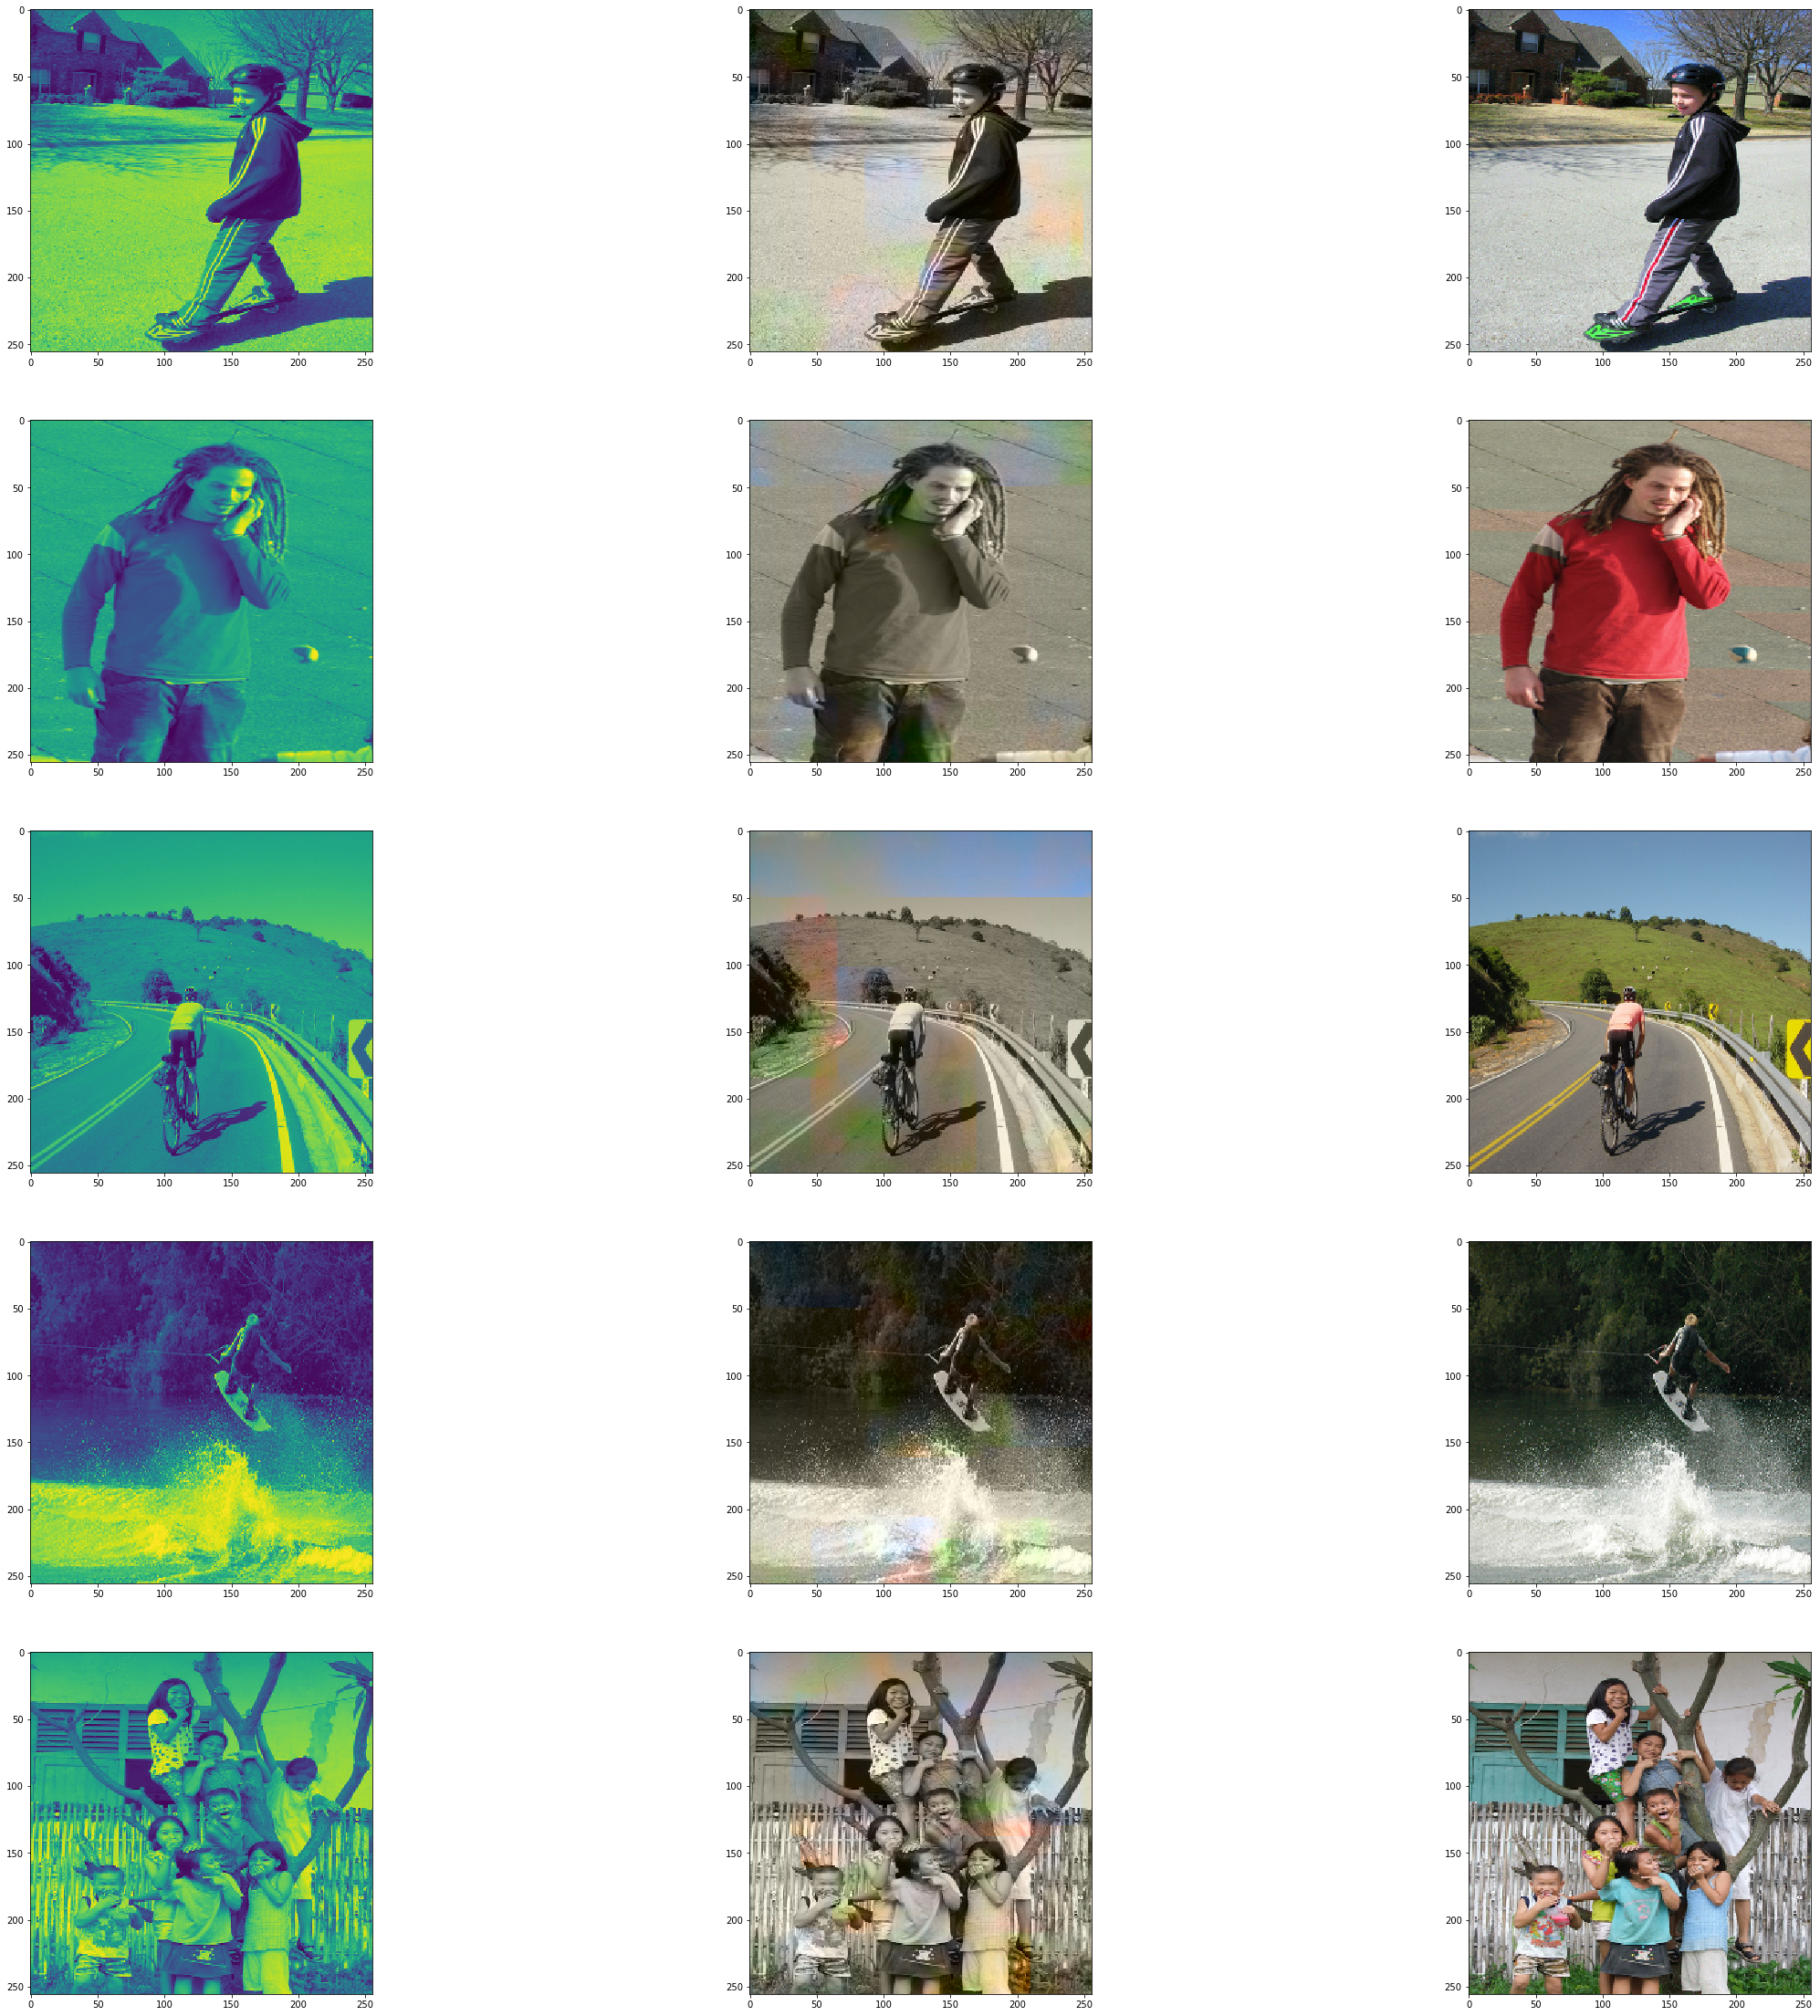

In [5]:
ans=test("images",num=5)
# BLACK & WHITE                                    PREDICTED                                          ORIGINAL

In [6]:
ans

{'2322334640_d4d22619ff.jpg': 917,
 '3275627207_0b41e44597.jpg': 917,
 '110595925_f3395c8bd6.jpg': 917,
 '300314926_0b2e4b64f5.jpg': 917,
 '3614595423_f9e0ab4fb0.jpg': 917}

In [7]:
for i in ans.keys():
    if i in train_data:
        print("train")
    else:
        print("test")

test
test
test
test
test


In [8]:
# 3552435734_04da83b905.jpg      #test
# 2261257940_449b6e6c91.jpg      #test
# 395461421_c586b136de.jpg       #test
# 2992658871_ac786d37a6.jpg      #test
# 3610836023_3a972b10b0.jpg      #test
# 2640000969_b5404a5143.jpg      #train
# 3537201804_ce07aff237.jpg      #train
# 2780087302_6a77658cbf.jpg      #train
# 171488318_fb26af58e2.jpg       #test


In [9]:
good_results=["3552435734_04da83b905.jpg","2261257940_449b6e6c91.jpg","395461421_c586b136de.jpg","2992658871_ac786d37a6.jpg"
             ,"3610836023_3a972b10b0.jpg","171488318_fb26af58e2.jpg","303795791_98ebc1d19a.jpg",'2272426567_9e9fb79db0.jpg','3622929632_26fb800000.jpg']

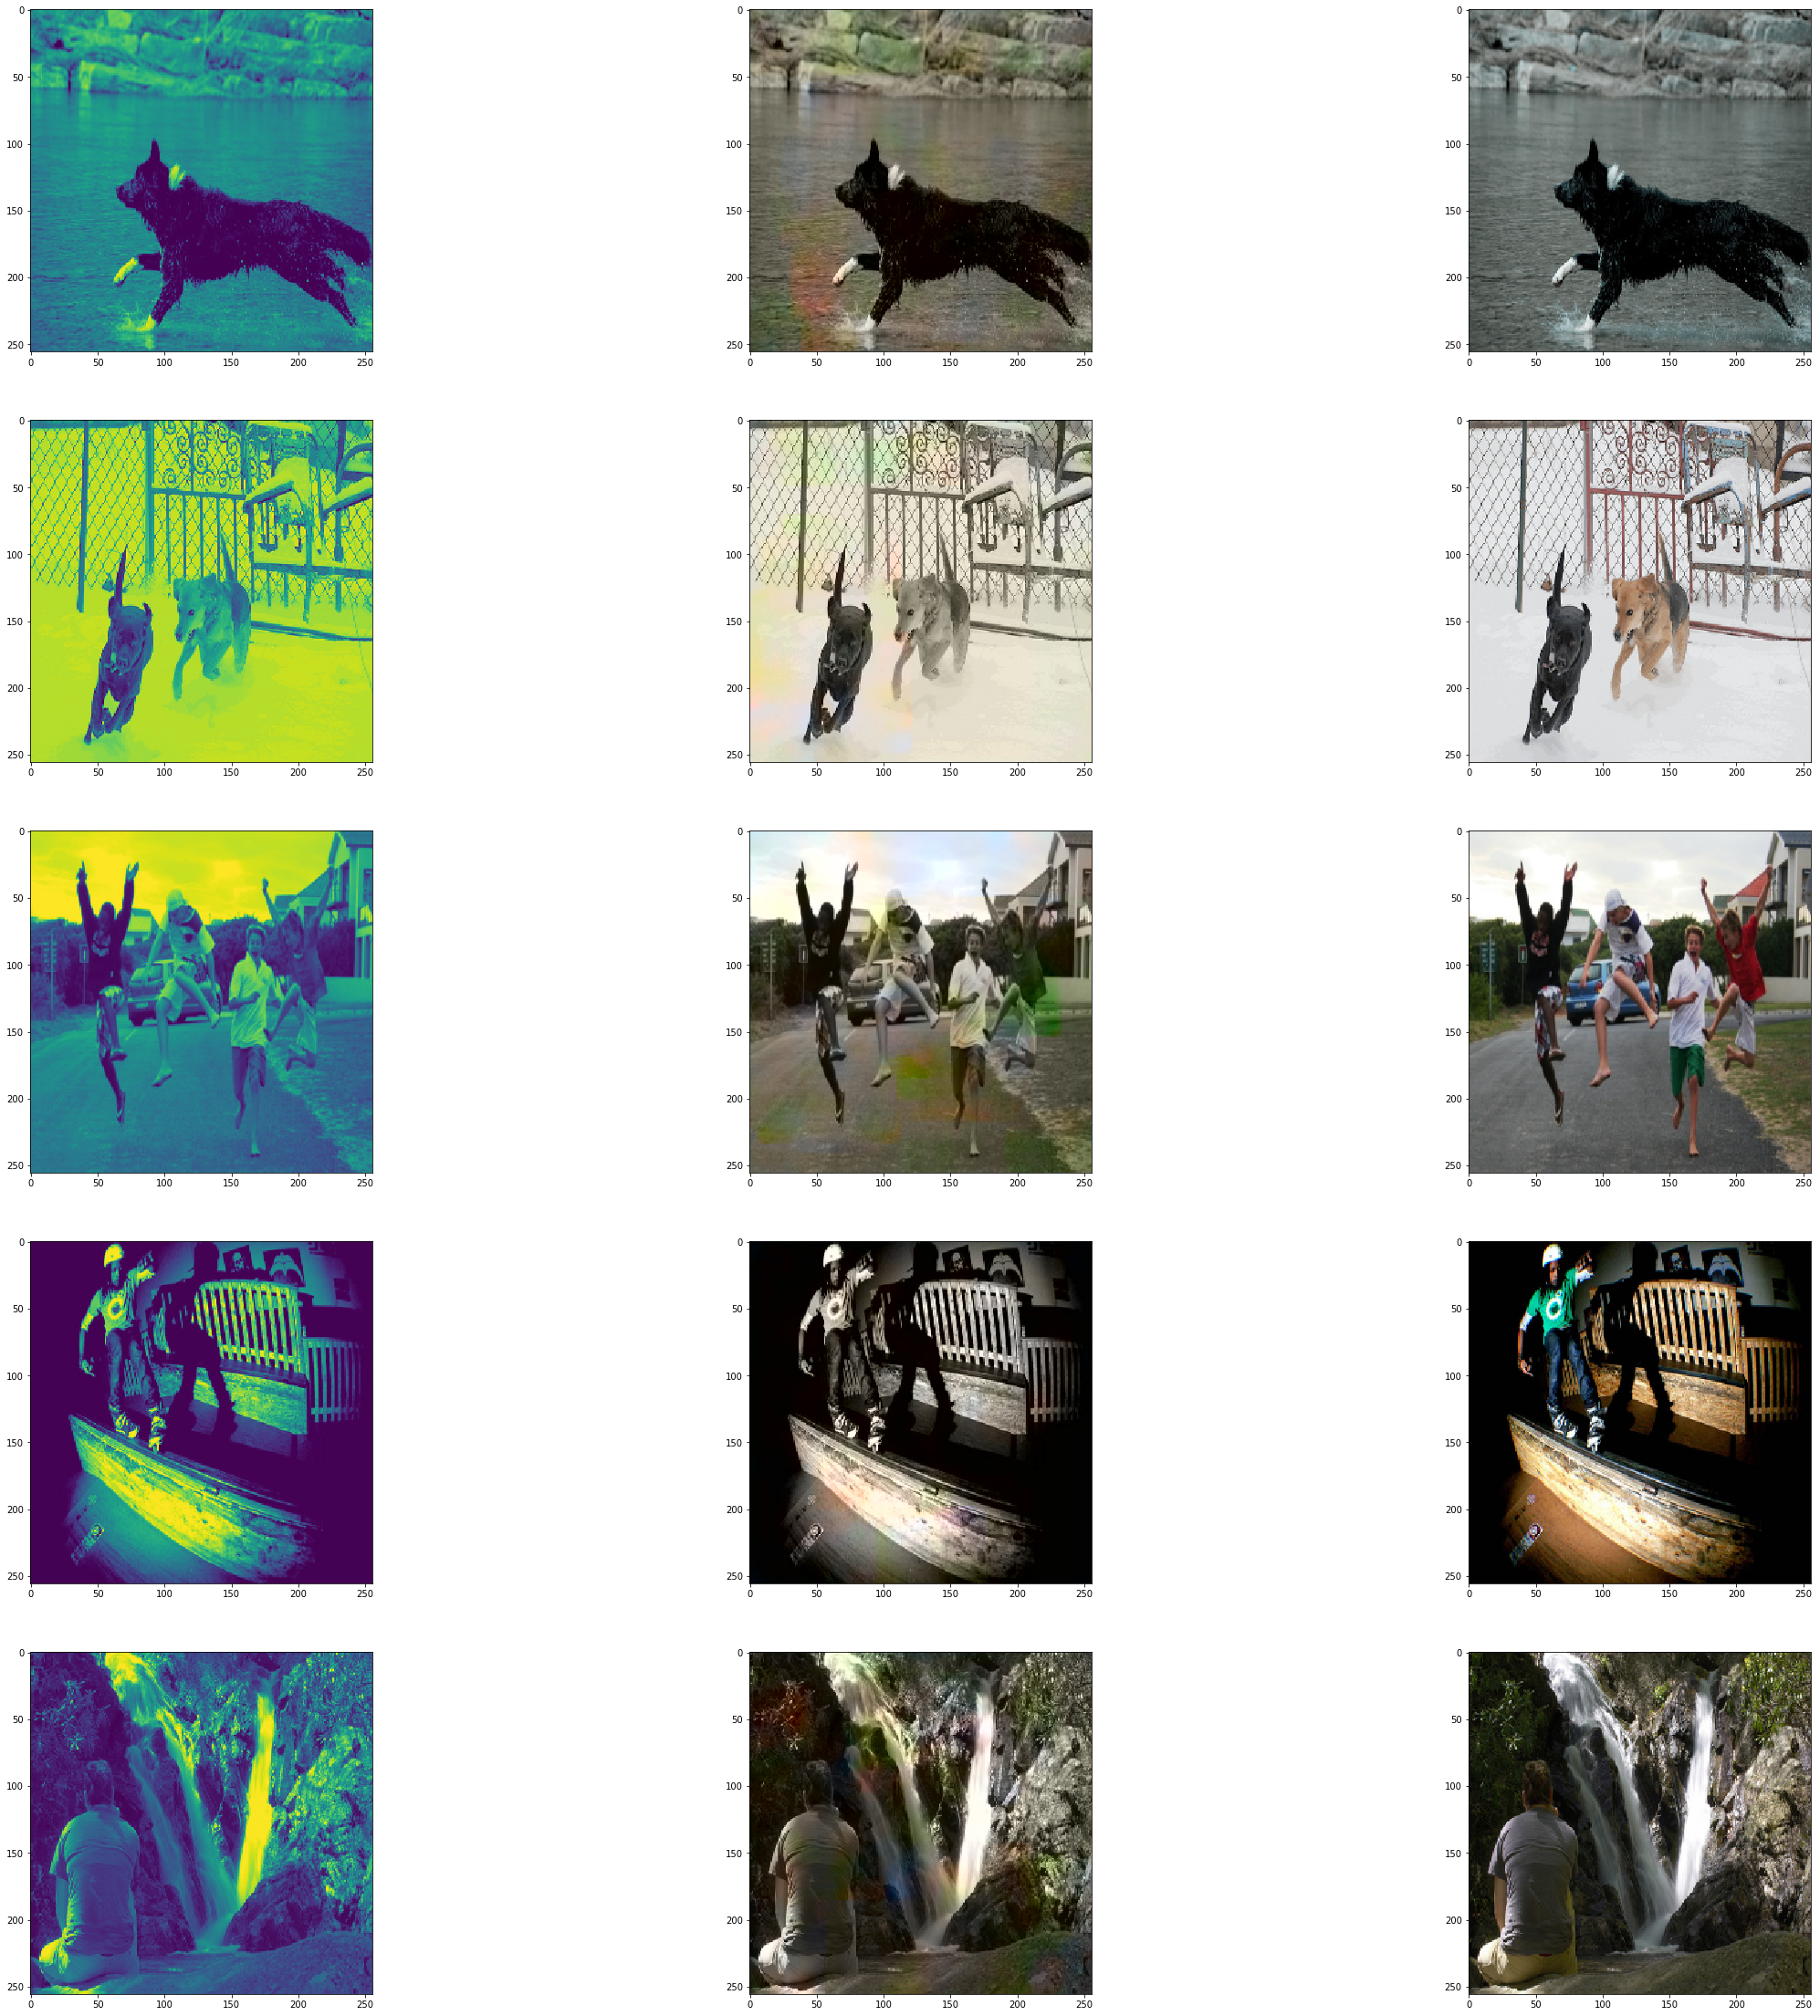

In [10]:
ans=test("images",num=5,excep=good_results)

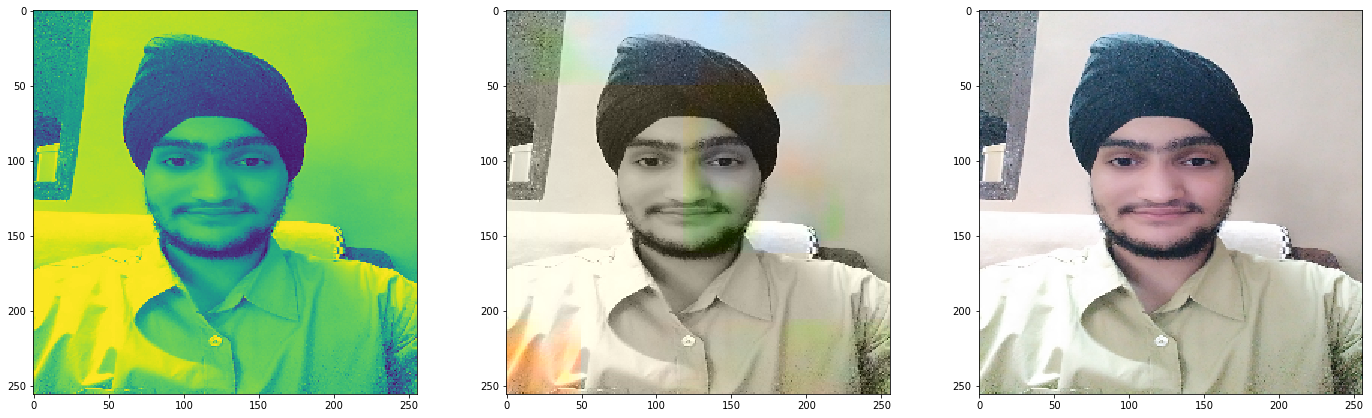

In [13]:
ans=test(".",num=3,excep=['IMG_20170718_154236.jpg'])